## DOMAIN: Automatic Ticketing System.

### CONTEXT: 
#### One of the key activities of any IT function is to “Keep the lights on” to ensure there is no impact to the Business operations. IT leverages  Incident  Management  process  to  achieve  the  above  Objective.  An  incident  is  something  that  is  unplanned  interruption  to  an  IT service or reduction in the quality of an IT service that affects the Users and the Business. The main goal of Incident Management process is to  provide  a  quick fix  /  workarounds  or  solutions  that  resolves  the  interruption  and  restores  the  service  to  its  full  capacity  to  ensure  no business  impact.  In  most  of  the  organisations,  incidents  are  created  by  various  Business  and  IT  Users,  End  Users/  Vendors  if  they  have access to ticketing systems, and from the integrated monitoring systems and tools. Assigning the incidents to the appropriate person or unit in the support team has critical importance to provide improved user satisfaction while ensuring better allocation of support resources. The assignment of incidents to appropriate IT groups is still a manual process in many of the IT organisations. Manual assignment of incidents is time  consuming  and  requires  human  efforts.  There  may  be  mistakes  due  to  human  errors  and  resource  consumption  is  carried  out ineffectively because of the misaddressing. On the other hand, manual assignment increases the response and resolution times which result in user satisfaction deterioration / poor customer service.

### Business  Domain  Value: 
#### In  the  support  process,  incoming  incidents  are  analysed  and  assessed  by  organisations  support  teams  to fulfill  the  request.  In  many  organisations,  better  allocation  and  effective  usage  of  the  valuable  support  resources  will  directly  result  in substantial cost savings. Currently the incidents are created by various stakeholders (Business Users, IT Users and Monitoring Tools) within IT Service  Management  Tool  and  are  assigned  to  Service  Desk  teams  (L1  /  L2  teams).  This  team  will  review  the  incidents  for  right  ticket categorization, priorities and then carry out initial diagnosis to see if they can resolve. Around ~54% of the incidents are resolved by L1 / L2 teams.  Incase  L1  /  L2  is  unable  to  resolve,  they  will  then  escalate  /  assign  the  tickets  to  Functional  teams  from  Applications  and Infrastructure (L3 teams). Some portions of incidents are directly assigned to L3 teams by either Monitoring tools or Callers / Requestors. L3 teams will carry out detailed diagnosis and resolve the incidents. Around ~56% of incidents are resolved by Functional / L3 teams. Incase if vendor  support  is  needed,  they  will  reach  out  for  their  support  towards  incident  closure. L1  /  L2  needs  to  spend  time  reviewing  Standard Operating  Procedures  (SOPs)  before  assigning  to  Functional  teams  (Minimum  ~25-30%  of  incidents  needs  to  be  reviewed  for  SOPs  before ticket assignment). 15 min is being spent for SOP review for each incident. Minimum of ~1 FTE effort needed only for incident assignment to L3  teams.  During  the  process  of  incident  assignments  by  L1  /  L2  teams  to  functional  groups,  there  were  multiple  instances  of  incidents getting assigned to wrong functional groups. Around ~25% of Incidents are wrongly assigned to functional teams. Additional effort needed for  Functional  teams  to  re-assign  to  right  functional  groups.  During  this  process,  some  of  the  incidents  are  in  queue  and  not  addressed timely resulting in poor customer service. Guided by powerful AI techniques that can classify incidents to right functional groups can help organizations to reduce the resolving time of the issue and can focus on more productive tasks


## PROJECT DESCRIPTION: 
#### In this capstone project, the goal is to build a classifier that can classify the tickets by analyzing text.

## Pre-Processing, Data Visualisation and EDA

##### -Exploring the given Data files 
##### -Understanding the structure of data 
##### -Missing points in data 
##### -Finding inconsistencies in the data 
##### -Visualising different patterns 
##### -Visualising different text features 
##### -Dealing with missing values 
##### -Text preprocessing 
##### -Creating word vocabulary from the corpus of report text data
##### -Creating tokens as required

In [1]:
#Libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Exploring the given Data files

In [2]:
#Load data to dataframe 
df_raw_tickets = pd.read_excel('./Input_Data.xlsx')

In [4]:
#First look at the Data
df_raw_tickets.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr_tool page   
4                                       skype error    
5     unable to log in to engineering tool and skype   
6  event: critical:HostName_221.company.com the v...   
7  ticket_no1550391- employment status - new non-...   
8               unable to disable add ins on outlook   
9                    ticket update on inplant_874773   

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7  ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                    ticket update on inplant_874773  fumkcsji sarmtlhy   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0  
5            GRP_0  
6            GRP_1  
7            GRP_0  
8            GRP_0  
9            GRP_0

In [5]:
# Observations from first look
# 4 Columns Short Desription Description Caller Assignment 
# Questions to be answered 
# Would classification of data depend on calleri.e. is there a caller that raises ticken only in certain category ?
# Name of callers looks masked so that they cannot be identified not sure how much information can be captured from that
# Lot of cleanup required in Description column

In [10]:
#Information on data
df_raw_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [11]:
#Describe the data 
df_raw_tickets.describe(include='all').T

count unique                top  freq
Short description  8492   7481     password reset    38
Description        8499   7817                the    56
Caller             8500   2950  bpctwhsn kzqsbmtp   810
Assignment group   8500     74              GRP_0  3976

### Notes
#### Not much data is missing for short description and desciption. Will see if a cobination of short description + description solve null value issue. To beign with will replace null value with  ' ' 
#### Maximum unique tickets are for password reset. There will be more will see how many password reset tickets are there after we have done Term Frequency analysis and removed words that add little or no information 
#### 50% tickets are for GRP_0 will try to see that types of tickets are getting assigned to GRP_0 and why ?
#### One tenth of the tickets are being created by caller "bpctwhsn kzqsbmtp" it would be good to see if there is a pattern for its tickets e.g. are they system generated tickets etc
#### In 56 cases description only contains the word the, it looks like for these tickets short description will have all the information required to resolve the issues. Hence we may have to see if both short desciption + description has to be joined as one string to do the analysis

## Missing points in data

In [15]:
#1. Null Values
df_raw_tickets.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [18]:
#Looking at Null data
df_raw_tickets[pd.isnull(df_raw_tickets).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  _x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...  ohdrnswl rezuibdt   
3383  _x000D_\n-connected to the user system using t...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn._x000D_\n-connect...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn._x000D_\n-connect...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn._x000D_\n-connect...  hxripljo efzounig   
3921  -user unable  tologin to vpn._x000D_\n-connect...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [19]:
# Replacing null with blank string
df_raw_tickets.fillna(" ", inplace = True)

In [20]:
df_raw_tickets.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [21]:
# No null values remaining

## Visualising different patterns

In [23]:
# Frequency Distribution on tickets in each group

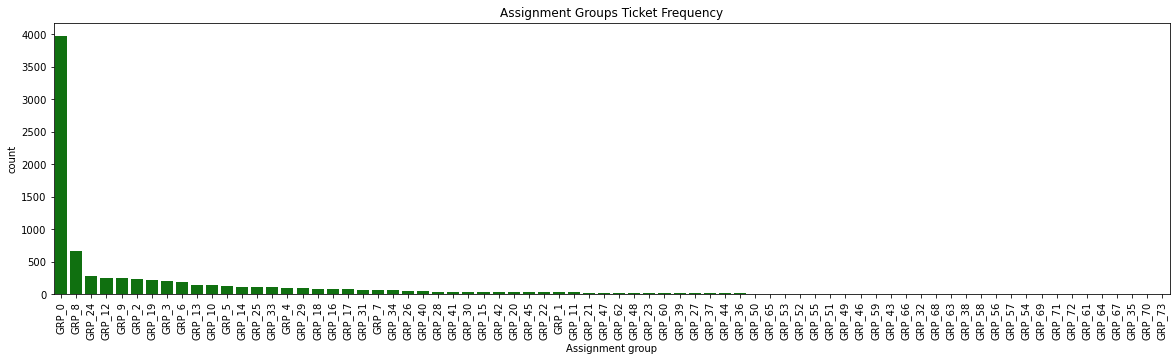

In [40]:
plt.figure(figsize=(20,5))
plt.title('Assignment Groups Ticket Frequency')
plt.ylabel('Count')
sns.countplot(x='Assignment group', data=df_raw_tickets, order=df_raw_tickets['Assignment group'].value_counts().index,color='green');
plt.xticks(rotation=90)
plt.show()

In [41]:
# Data is heavy on certain groups. The thought process is that we use AIML for auto assinging queue for frequently 
# occuring issues and have a common Queue lets call Manual Queue for low frequency items. We continue using human 
# queue classification for those items

In [52]:
pd.set_option("display.max_rows", None)
df_raw_tickets['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_62      25
GRP_48      25
GRP_23      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_65      11
GRP_53      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_49       6
GRP_46       6
GRP_59       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_68       3
GRP_63       3
GRP_38       3
GRP_58       3
GRP_56       3
GRP_57       2
GRP_54       2
GRP_69       2
GRP_71    

### Notes 
#### 6 groups have 1 ticket.  
#### 5 groups have 2 tickets
#### 25 groups have less than 10 tickets

#### Will see later if they have something unique in thier description i.e. application name so that correct ticket can be assinged automatically.

In [53]:
# Analysis of frequent caller
df_raw_tickets['Caller'].value_counts()

bpctwhsn kzqsbmtp                 810
ZkBogxib QsEJzdZO                 151
fumkcsji sarmtlhy                 134
rbozivdq gmlhrtvp                  87
rkupnshb gsmzfojw                  71
jloygrwh acvztedi                  64
spxqmiry zpwgoqju                  63
oldrctiu bxurpsyi                  57
olckhmvx pcqobjnd                  54
jyoqwxhz clhxsoqy                  51
dkmcfreg anwmfvlg                  51
efbwiadp dicafxhv                  45
afkstcev utbnkyop                  32
gzhapcld fdigznbk                  30
mnlazfsr mtqrkhnx                  28
uvrbhlnt bjrmalzi                  27
entuakhp xrnhtdmk                  25
vzqomdgt jwoqbuml                  24
jionmpsf wnkpzcmv                  24
bozdftwx smylqejw                  23
utyeofsk rdyzpwhi                  21
qasdhyzm yuglsrwx                  21
rxoynvgi ntgdsehl                  21
vbwszcqn nlbqsuyv                  19
hbmwlprq ilfvyodx                  17
ugyothfz ugrmkdhx                  17
niptbwdq cse

In [56]:
#See if any caller rasied ricket only in any specific group
df_raw_tickets['Caller'].groupby(df_raw_tickets['Assignment group']).value_counts().nlargest(10)

Assignment group  Caller           
GRP_8             bpctwhsn kzqsbmtp    362
GRP_9             bpctwhsn kzqsbmtp    153
GRP_0             fumkcsji sarmtlhy    132
GRP_5             bpctwhsn kzqsbmtp     96
GRP_6             bpctwhsn kzqsbmtp     89
GRP_0             rbozivdq gmlhrtvp     86
GRP_10            bpctwhsn kzqsbmtp     60
GRP_0             olckhmvx pcqobjnd     54
GRP_8             ZkBogxib QsEJzdZO     54
GRP_0             efbwiadp dicafxhv     45
Name: Caller, dtype: int64

In [57]:
# fumkcsji sarmtlhy has rasied 134 tickets and 132 tickets out of it have been in Group0
# rbozivdq gmlhrtvp has rasied 87 tickets and 86 of it is in GRP_0
# olckhmvx pcqobjnd has raised 54 ticekts and all 54 are in GRP_0

In [58]:
df_raw_tickets.tail(10)

Short description  \
8490                         check status in purchasing   
8491                                     vpn for laptop   
8492                 hr_tool etime option not visitble    
8493           erp fi  - ob09, two accounts to be added   
8494  tablet needs reimaged due to multiple issues w...   
8495                  emails not coming in from zz mail   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8498                     machine nÃ£o estÃ¡ funcionando   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8490  please contact ed pasgryowski (pasgryo) about ...  mpihysnw wrctgoan   
8491  \n\nreceived from: jxgobwrm.qkugdipo@gmail.com...  jxgobwrm qkugdipo   
8492                 hr_tool etime option not visitble   tmopbken ibzougsd   
8493  i am sorry, i have another two accounts that n...  ipwjorsc uboapexr   
8494  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8495  _x000D_\n_x000D_\nreceived from: avglmrts.vhqm...  avglmrts vhqmtiua   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8498  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
8490           GRP_29  
8491           GRP_34  
8492            GRP_0  
8493           GRP_10  
8494            GRP_3  
8495           GRP_29  
8496            GRP_0  
8497            GRP_0  
8498           GRP_62  
8499           GRP_49

In [60]:
# Fixing text that has "curly quotes" applied on top i.e. mojibreaks that arise due to ACII encoding
!pip install ftfy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.0 MB/s eta 0:00:00


In [63]:
from ftfy import fix_encoding, fix_text, badness
fix_text('machine nÃ£o estÃ¡ funcionando')

'machine não está funcionando'

In [65]:
fix_text(df_raw_tickets['Short description'][8498])

'machine não está funcionando'

In [66]:
df_raw_tickets['Short description'] = df_raw_tickets['Short description'].apply(fix_text)
df_raw_tickets['Description'] = df_raw_tickets['Description'].apply(fix_text)

In [67]:
df_raw_tickets

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
5        unable to log in to engineering tool and skype   
6     event: critical:HostName_221.company.com the v...   
7     ticket_no1550391- employment status - new non-...   
8                  unable to disable add ins on outlook   
9                       ticket update on inplant_874773   
10    engineering tool says not connected and unable...   
11              hr_tool site not loading page correctly   
12    unable to login to hr_tool to sgxqsuojr xwbeso...   
13                     user wants to reset the password   
14                             unable to open payslips    
15                      ticket update on inplant_874743   
16                       unable to login to company vpn   
17        when undocking pc , screen will not come back   
18                            erp SID_34 account locked   
19                              unable to sign into vpn   
20                             unable to check payslips   
21                                            vpn issue   
22                             unable to connect to vpn   
23                  user called for vendor phone number   
24                                      vpn not working   
25                           erp SID_37 password reset    
26         unable to login to hr_tool to check payslips   
27                                   account locked out   
28                           unable to login to hr_tool   
29                      unable to log in to erp SID_34    
30            password reset for collaboration_platform   
31                                         reset  users   
32                      duplication of network address.   
33                                   ess password reset   
34                       unable to install flash player   
35    ticket_no1564677-employment status - new non-e...   
36         erp SID_34 account unlock and password reset   
37         unable to resolve ticket_no assigned to self   
38                          installing engineering tool   
39                           call for ecwtrjnq jpecxuty   
40                       ticket update - inplant_874615   
41                        tablet 7350-sound not working   
42                            unable to login to system   
43    please reroute jobs on printer01 to printer02 ...   
44                     unable to login to hr_tool etime   
45    can not log into hr_tool etime through single ...   
46    password changed in password_management_tool b...   
47    job Job_1424 failed in job_scheduler at: 10/31...   
48    windows password change via password_managemen...   
49         status does not change on telephony_software   
50    job mm_zscr0099_dly_merktc3 failed in job_sche...   
51                           call for ecwtrjnq jpecxuty   
52    vip 2 - i need my password_management_tool pas...   
53                          reset scm_software password   
54                   account locked out while in office   
55                                        skype meeting   
56                            enquiry on impact rewards   
57    need dn for material 3346599/ plant plant_197/...   
58                                unlock logon password   
59    job mm_zscr0099_dly_merktc2 failed in job_sche...   
60    job Job_3181 failed in job_scheduler at: 10/31...   
61              password changed required for user- abc   
62                                  issues with outlook   
63                                  urgent - create dlv   
64    apac company : two switches are down since 3.4...   
65                 error login on to the SID_34 system.   
66              delivery note can't do post goods issue   
67    job Job_1338 failed 

In [91]:
#Languages Detect
!pip install langdetect

In [93]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

def detectLang(value):
    try:
        return 
df_raw_tickets['Short description'].apply(detect)

LangDetectException: No features in text.